# Predicting Air Delays 
----

Thank you for your review of my code notebook.
This notebook's goal is to obtain, modify, clean, and prepare the dataset for exposure on a Machine Learning algorithm.

---
#### Problem Statement: 
Both travelers and airlines find delays frustrating and costly. This project attempts to be able to predict the probability of a commercial flight delay for any flight in the United States. 

---

#### MVP:
My product will be a small lightweight application run on `streamlit` platform for proof-of-concept where a user can find the probability of their desired flight having a delay, how long the delay may be, and how much will the delay cost the user in _lost time_ at the destination 

---
# Intake, Cleaning, and EDA. 

The primary challenge in this notebook is managing a large dataset. 
The next challenge will be to conduct meaningful EDA across the whole dataset. 
The notebook is structured as follows. 
1. Imports and set up
2. The size and complexity issue. 
3. Cleaning steps. 
4. Feature engineering and selection. 
5. Save the final CSV and discuss next steps. 

---


## 1. Set-up
----
I will be making use of `os`, `glob`, and `Amadeus API` libraries for python. 

`os` and `glob` will be used in conjunction with command line commands from the notebook to join the large CSV tables together.

`amadeus` is used as a way to utilize the service's self-service APIs. The API requires a token /key to use. 
[**sign up here**](https://developers.amadeus.com)


In [1]:
# !pip install amadeus

In [2]:
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


 I have 68 CSV files. Each file represents 1 month of flight history from all U.S. Airports. As a result each CSV is approximatley 150mb in size. Loading a few of them into the workspace of the notebook will result in a loss of data due to data exceeding memory capacity on the local machine. 
 <br>
 <br>
The approach will be to manipulate each of the CSV's and join them directly in the command line. 

In [4]:
#change the directory from root to where all the files I will join will be
os.chdir('/Volumes/lacie/data_ingestion/capstone_hopper')

### Data Sources
---
This project attempts gathered delay data from the **Department of Transportation (DOT) Flight Delay reporting Database**. Sadly, there was no public API available to access this data from DOT or from Federal Aviation Administration.

Given there was no way to programatically acquire the desired amount of data, I proceeded to utilize the basic public data library tool and download a CSV for one monthly period at a time.  

This created a lot of _just **too big** files_ and hence our first unanticipated technical challenge with this project; what do I do? 

The plan: use the command line to join all the tables. 
After cleaning see how large the file is. 

To implement this plan, using `glob` methods and direct command line. 


---
References<br>
[Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FGJ)
<br>
[GLOB tutorial](https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/)

### Create new dataset from monthly data sources. 
---
Run the below code if you have access to the files, which are large, on your local machine.

In [3]:
#a list of all the files. a total of 6.958GB of unfiltered raw data. 
!ls

10_nov_20.csv 23_oct_19.csv 36_sep_18.csv 49_aug_17.csv 61_aug_16.csv
11_oct_20.csv 24_sep_19.csv 37_aug_18.csv 4_may_21.csv  62_jul_16.csv
12_sep_20.csv 25_aug_19.csv 38_jul_18.csv 50_jul_17.csv 63_jun_16.csv
13_aug_20.csv 26_jul_19.csv 39_jun_18.csv 51_jun_17.csv 64_may_16.csv
14_jul_20.csv 27_jun_19.csv 3_jun_21.csv  52_may_17.csv 65_apr_16.csv
15_jun_20.csv 28_may_19.csv 40_may_18.csv 53_apr_17.csv 66_mar_16.csv
16_may_20.csv 29_apr_19.csv 41_apr_18.csv 54_mar_17.csv 67_feb_16.csv
17_apr_20.csv 2_jul_21.csv  42_mar_18.csv 55_feb_17.csv 68_jan_16.csv
18_mar_20.csv 30_mar_19.csv 43_feb_18.csv 56_jan_17.csv 6_mar_21.csv
19_feb_20.csv 31_feb_19.csv 44_jan_18.csv 57_dec_16.csv 7_feb_21.csv
1_aug_21.csv  32_jan_19.csv 45_dec_17.csv 58_nov_16.csv 8_jan_21.csv
20_jan_20.csv 33_dec_18.csv 46_nov_17.csv 59_oct_16.csv 9_dec_20.csv
21_dec_19.csv 34_nov_18.csv 47_oct_17.csv 5_apr_21.csv
22_nov_19.csv 35_oct_18.csv 48_sep_17.csv 60_sep_16.csv


In [4]:
#using glob, to locate all file names. 
file_ext = '.csv'
files = sorted([file for file in glob.glob(f'*{file_ext}')])

In [5]:
#the first five in the list to confirm 
print('first five files :',files[0:5],
      'last 5 files: ' ,files[-4:])

first five files : ['10_nov_20.csv', '11_oct_20.csv', '12_sep_20.csv', '13_aug_20.csv', '14_jul_20.csv'] last 5 files:  ['6_mar_21.csv', '7_feb_21.csv', '8_jan_21.csv', '9_dec_20.csv']


In [6]:
#using the pd.concat() i will read from a list comprehension to concat each and every csv. 
all_flights = pd.concat([pd.read_csv(file) for file in files ])


/var/folders/fy/0gjwghjd3qxdc86mx10x01rr0000gp/T/ipykernel_1744/3199323081.py:2: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  all_flights = pd.concat([pd.read_csv(file) for file in files ])


In [7]:
#export to csv
all_flights.to_csv( "all_flights.csv", index=False, encoding='utf-8-sig')

### Load existing dataset and then random subset the main data. 
---
Run this code from the repo to rebuild the whole data sent. 

In [4]:
all_flights = pd.read_csv('/Volumes/lacie/data_ingestion/capstone_hopper/all_flights.csv')

/Users/nickvanbergen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
all_flights.shape

(34409230, 34)

The process is completed with 34,409,230 flights with 34 _raw_ feature columns. It took approximately 8 minutes to process the file. 

In [6]:
all_flights.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,DIVERTED,CRS_ELAPSED_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,2020,11,12,4,2020-11-12,AA,N844NN,1783,PHL,"Philadelphia, PA",...,0.0,235.0,1.0,1303.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,11,13,5,2020-11-13,AA,N339PL,1783,PHL,"Philadelphia, PA",...,0.0,235.0,1.0,1303.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Subsetting
---
Having already run the subset of the main data, please load or read the data from the last cell in this section.

In [126]:
#sample = all_flights.sample(frac = 0.25)

In [127]:
#lower case the columns headings. 
sample.columns = sample.columns.str.lower()

In [128]:
print(f"Number of sampled flights, {sample.shape[0] :,}")

Number of sampled flights, 8,602,308


In [133]:
# save this to CSV for further processing. 
#sample.to_csv('sample.csv', index = False)

In [5]:
sample = pd.read_csv('sample.csv')

<br>

-----

<br>

## EDA on the time columns. 
`year`, `month`, `day_of_month`, `day_of_week`
these will be analyze against the `arr_delay` values. 

---

`arr_delay` reveals the number of minutes difference between the scheduled arrival and actual arrival values. 


### Year

In [6]:
#look at the count of years included in the sample.
print(f" count \n {sample['year'].value_counts()}, \n proportion \n {sample['year'].value_counts(normalize = True)}")

 count 
 2019    1856243
2018    1802439
2017    1417290
2016    1404518
2020    1173290
2021     948528
Name: year, dtype: int64, 
 proportion 
 2019    0.215784
2018    0.209530
2017    0.164757
2016    0.163272
2020    0.136392
2021    0.110264
Name: year, dtype: float64


In [7]:
#where there was a delay
print(f" count \n {sample[sample['arr_delay']>15]['year'].value_counts()}, \n proportion \n {sample[sample['arr_delay']>15]['year'].value_counts(normalize = True)}")

 count 
 2019    336235
2018    326242
2017    247872
2016    231764
2021    153110
2020    103337
Name: year, dtype: int64, 
 proportion 
 2019    0.240415
2018    0.233270
2017    0.177234
2016    0.165716
2021    0.109477
2020    0.073888
Name: year, dtype: float64


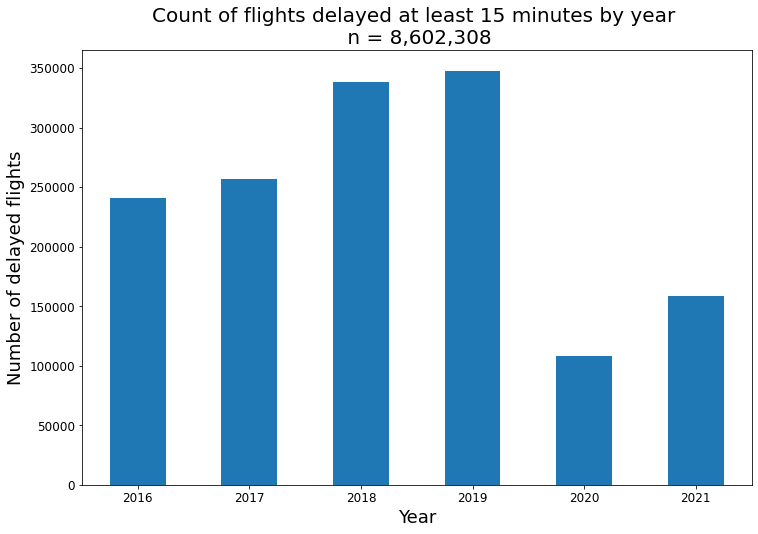

In [8]:
sample[sample['arr_delay']>=15]['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,8));
plt.title(f'Count of flights delayed at least 15 minutes by year \n n = {sample.shape[0]:,}', size = 20);
plt.xlabel('Year', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Number of delayed flights', size = 18 )
plt.yticks(fontsize = 12);

#### Discussion: What is a _delayed_ flight?
----
We will consider the baseline measure of a delay being at least 15 minutes. 
It will be necessary to begin to formulate what buckets or delay classes we will have for this problem. 

As expected though, our sample sees a sharp drop off of flights being delayed in 2020 due to the restricted operation environment due to the global pandemic.

Clearly, a sharp drop off in total flights and delayed flights. 

### Month

In [9]:
sample['month'].unique()

array([10, 12,  6,  1,  7,  4,  3,  9,  2,  5, 11,  8])

In [10]:
months = {1 : '1-Jan', 2: '2-Feb', 3 : '3-Mar',
         4: '4-Apr', 5: '5-May', 6: '6-Jun',
         7: '7-Jul', 8:'8-Aug', 9 : '9-Sep',
         10 : '10-Oct', 11:'11-Nov', 12: '12-Dec'}

In [11]:
sample['month'] = sample['month'].apply(lambda x: months[x])
sample['month'].unique()

array(['10-Oct', '12-Dec', '6-Jun', '1-Jan', '7-Jul', '4-Apr', '3-Mar',
       '9-Sep', '2-Feb', '5-May', '11-Nov', '8-Aug'], dtype=object)

In [12]:
round(sample['month'].value_counts(normalize = True), 3)

3-Mar     0.096
8-Aug     0.095
7-Jul     0.095
1-Jan     0.088
6-Jun     0.088
4-Apr     0.084
5-May     0.084
2-Feb     0.081
10-Oct    0.074
12-Dec    0.073
11-Nov    0.071
9-Sep     0.071
Name: month, dtype: float64

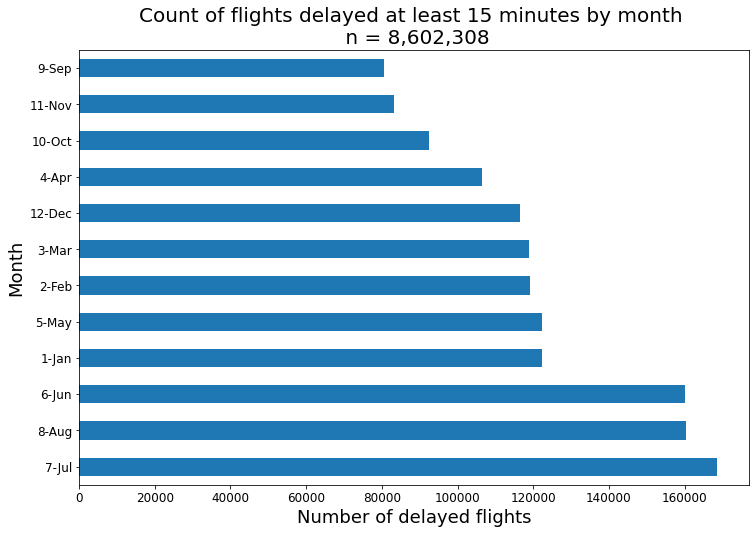

In [17]:
#counts of any delayed flight
round(sample[sample['arr_delay']>=15]['month'].value_counts()).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Count of flights delayed at least 15 minutes by month \n n = {sample.shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Month', size = 18 )
plt.yticks(fontsize = 12);

#### Discussion: Summer months.
----
Traditionally, the summer travel season is the busiest season for airlines to operate flights. 
This means, for business and leisure customer segments there is a higher persistent historical chance of delay due to the increase in flights that are in the air system. 

In [150]:
## add total dealy minutes if month equals Jun Jul Aug for each year in data set. 
len(sample['year'].unique())

6

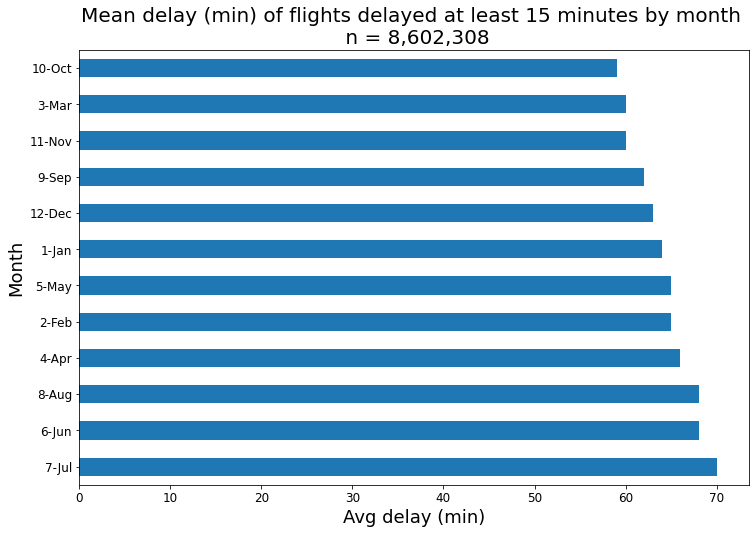

In [35]:
sample[sample['arr_delay']>=15]['arr_delay'].groupby(sample['month']).mean().astype(int).sort_values(ascending = False).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Mean delay (min) of flights delayed at least 15 minutes by month \n n = {sample.shape[0]:,}', size = 20);
plt.xlabel('Avg delay (min)', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Month', size = 18 )
plt.yticks(fontsize = 12);

The figure make clearer that in the sample data, a traveler would experience an average delay between 60 and 70 minutes at any point in the year. 

---


### Day of the week. 
The day of the week is represented by a number begining on Monday with 1 and ending the week with 7. The data dictionary states that there is an unknown value of 9. 

depending on how wide you want your research to go, let's ensure that there are no unknown days by masking and updating our `sample` variable with the resulting dataframe. 

In [22]:
sample = sample[sample['day_of_week'] != 9].copy()

Next, I will want to take basic counts and measure delays as we did earlier with `year` and `month`. 
<br> 
Like the `month` variable, the data came over encoded with integers as mentioned above. 

In [26]:
days = { 1: 'Mon', 2: 'Tue', 3:'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

In [28]:
sample['day_of_week'] = sample['day_of_week'].apply(lambda x: days[x])
sample['day_of_week'].unique()

array(['Sun', 'Fri', 'Mon', 'Sat', 'Wed', 'Thu', 'Tue'], dtype=object)

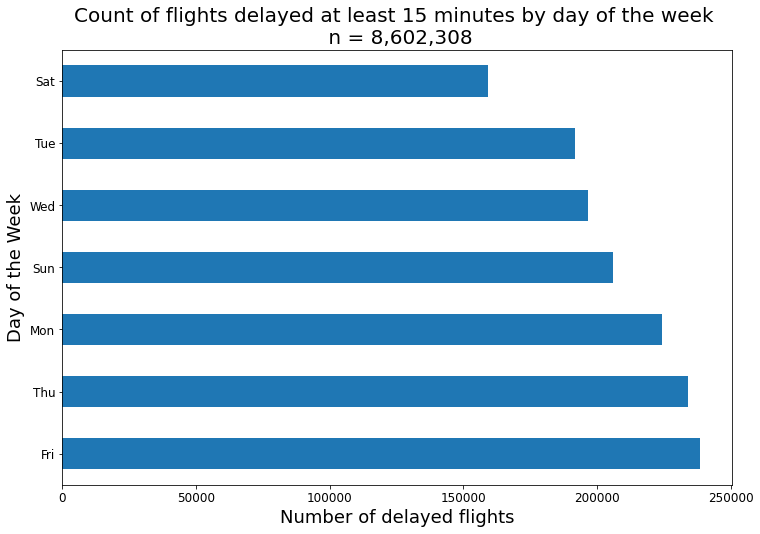

In [29]:
#counts of any delayed flight
round(sample[sample['arr_delay']>=15]['day_of_week'].value_counts()).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Count of flights delayed at least 15 minutes by day of the week \n n = {sample.shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Day of the Week', size = 18 )
plt.yticks(fontsize = 12);

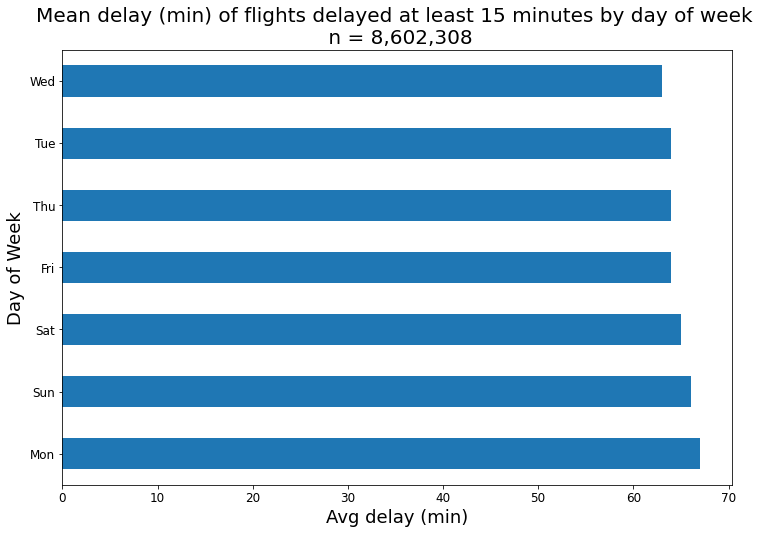

In [31]:
sample[sample['arr_delay']>=15]['arr_delay'].groupby(sample['day_of_week']).mean().astype(int).sort_values(ascending = False).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Mean delay (min) of flights delayed at least 15 minutes by day of week \n n = {sample.shape[0]:,}', size = 20);
plt.xlabel('Avg delay (min)', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Day of Week', size = 18 )
plt.yticks(fontsize = 12);

#### Discussion
There doesn't appear to be a day-to-day difference in the mean delay in the sample data. 
There is an apparent advantage to flying on Saturday, but let's consider the scale of the chart and the actual difference between the highest mean delay on a Saturday vs on a Friday. 

----

## EDA on airline and airports on arrival delay (`arr_delay`):
We can review other columns that are specific to company (the airline) and to location (the origin and destination airports).

In [36]:
sample.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin',
       'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'cancelled', 'cancellation_code', 'diverted',
       'crs_elapsed_time', 'flights', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'unnamed: 33'],
      dtype='object')